In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
file_path_1 = "../../data/EGFR/result_summary_round1.csv"
file_path_2 = "../../data/EGFR/result_summary_round2.csv"

print("--- Loading and Merging Datasets ---")

try:
    df1 = pd.read_csv(file_path_1)
    df2 = pd.read_csv(file_path_2)
    
    df1['Round'] = 'Round 1'
    df2['Round'] = 'Round 2'
    
    print(f"File 1 loaded: {len(df1)} rows")
    print(f"File 2 loaded: {len(df2)} rows")

    df = pd.concat([df1, df2], ignore_index=True)
    print(f"Combined Dataset Total: {len(df)} rows")

except Exception as e:
    print(f"Error loading files: {e}")
    df = pd.DataFrame()

--- Loading and Merging Datasets ---
File 1 loaded: 202 rows
File 2 loaded: 402 rows
Combined Dataset Total: 604 rows


In [11]:
if not df.empty:
    print("\n" + "="*40)
    print("      DATASET STRUCTURE OVERVIEW      ")
    print("="*40)
    
    print(f"\n1. Shape (Rows, Columns): {df.shape}")
    
    print("\n2. First 5 Rows (Preview):")
    display(df.head())

    print("\n3. Column Names & Data Types:")
    print(df.info())

    print("\n" + "="*40)
    print("      MISSING VALUES ANALYSIS      ")
    print("="*40)
    
    missing_counts = df.isnull().sum()
    missing_data = missing_counts[missing_counts > 0]
    
    if not missing_data.empty:
        print("\nColumns with Missing Values:")
        print(missing_data.sort_values(ascending=False))
    else:
        print("\n✨ No missing values found!")

    print("\n" + "="*40)
    print("      CONTENT INSPECTION      ")
    print("="*40)

    key_cols = ['kd', 'KD', 'affinity', 'rank_metric', 'sequence']
    
    for col in key_cols:
        if col in df.columns:
            print(f"\n--- Column: '{col}' ---")
            print(f"Unique Values: {df[col].nunique()}")
            print(f"Sample Values: {df[col].dropna().unique()[:8]}") # Show first 8 non-nan values
        
    if 'Round' in df.columns:
        print("\n--- Data Distribution by Round ---")
        print(df['Round'].value_counts())
        
    if 'sequence' in df.columns:
        dupes = df.duplicated(subset=['sequence']).sum()
        print(f"\n Duplicate Sequences Found: {dupes}")
    else:
        print("\n(Skipping sequence duplicate check: 'sequence' column not found)")


      DATASET STRUCTURE OVERVIEW      

1. Shape (Rows, Columns): (604, 18)

2. First 5 Rows (Preview):


,name,username,sequence_name,kd,sequence,dna,plddt,pae_interaction,similarity_check,model_names,methods,Round,binding_strength,binding,expression,esm_pll,iptm,design_models
0,Cetuximab_scFv,NaN,NaN,6.638345e-09,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLE...,ATGCAGGTGCAGCTGAAACAGAGCGGCCCGGGCCTGGTGCAGCCAT...,NaN,NaN,NaN,NaN,NaN,Round 1,NaN,NaN,NaN,NaN,NaN,NaN
1,ahmedsameh-Q3,ahmedsameh,Q3,3.694188e-08,WVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,ATGTGGGTGCAGCTGCAGGAAAGCGGCGGCGGCTTAGTGCAACCAG...,77.840455,28.217942,0.992,"[""Rosetta""]","[""Physics Based""]",Round 1,NaN,NaN,NaN,NaN,NaN,NaN
2,ahmedsameh-yy2,ahmedsameh,yy2,6.275390e-08,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSHAMGWFRQAPGKQRE...,ATGCAGGTGCAGCTGCAGGAAAGCGGCGGCGGCTTAGTGCAACCAG...,77.288939,28.177070,0.992,"[""Rosetta""]","[""Physics Based""]",Round 1,NaN,NaN,NaN,NaN,NaN,NaN
3,martin.pacesa-EGFR_l138_s90285_mpnn2,martin.pacesa,EGFR_l138_s90285_mpnn2,4.909414e-07,SPFDLFLDRLPEQDPEMTEEGKWWAEEMKRMVGPHFEELEEYIRNN...,ATGAGCCCGTTTGATCTGTTTCTGGATCGCCTGCCGGAACAGGATC...,88.653551,16.878782,NaN,"[""AF2 Backprop""]","[""Hallucination""]",Round 1,NaN,NaN,NaN,NaN,NaN,NaN
4,x.rustamov-m_18_41,x.rustamov,m_18_41,4.773972e-06,SAGQAQIEEVKARADKAKTLEELKELRKEAYEKNWKAYMAVVDETE...,ATGAGCGCGGGCCAGGCGCAGATTGAAGAAGTGAAAGCGCGCGCAG...,89.580600,14.921833,NaN,"[""AF2 Backprop""]","[""Hallucination""]",Round 1,NaN,NaN,NaN,NaN,NaN,NaN



3. Column Names & Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              604 non-null    object 
 1   username          601 non-null    object 
 2   sequence_name     201 non-null    object 
 3   kd                63 non-null     float64
 4   sequence          604 non-null    object 
 5   dna               604 non-null    object 
 6   plddt             601 non-null    float64
 7   pae_interaction   601 non-null    float64
 8   similarity_check  326 non-null    float64
 9   model_names       201 non-null    object 
 10  methods           201 non-null    object 
 11  Round             604 non-null    object 
 12  binding_strength  402 non-null    object 
 13  binding           402 non-null    object 
 14  expression        402 non-null    object 
 15  esm_pll           400 non-null    float64
 16  iptm         


--- 1. Handling Duplicates (Across Rounds) ---
Duplicates found: 1
Unique Designs remaining: 603

--- 2. Validating Binder Count ---
Using column 'kd' for affinity.
Designs with VALID numeric KD: 62
>> SUCCESS: 62 is enough for a small regression pilot.

--- 3. ipSAE / Interface Metric Check ---
Found Interface Metrics: ['pae_interaction', 'iptm']


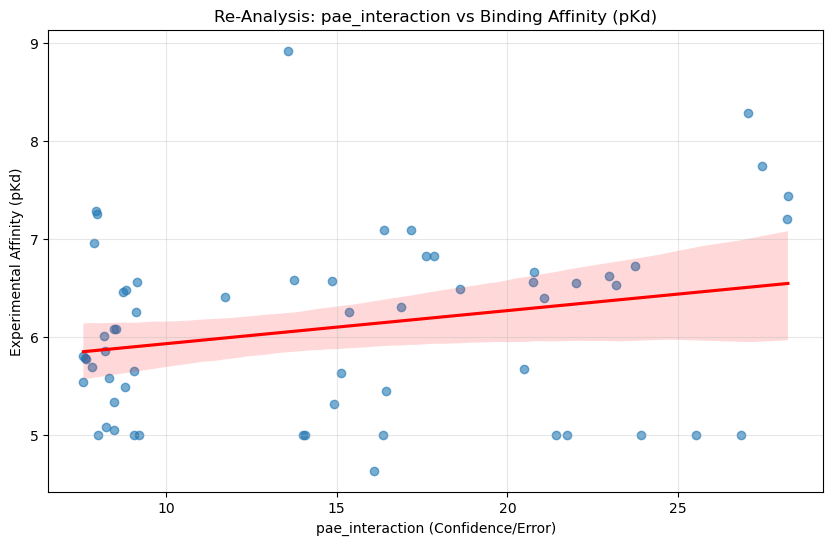

Note: If using PAE (Error), a NEGATIVE slope is good (Lower Error = Higher Affinity).
      If using ipTM (Score), a POSITIVE slope is good (Higher Score = Higher Affinity).


In [ ]:
if not df.empty:
    print("\n--- 1. Handling Duplicates (Across Rounds) ---")
    
    if 'sequence' in df.columns:
        duplicate_count = df.duplicated(subset=['sequence'], keep='last').sum()
        print(f"Duplicates found: {duplicate_count}")
        
        df_clean = df.drop_duplicates(subset=['sequence'], keep='last').copy()
        print(f"Unique Designs remaining: {len(df_clean)}")
    else:
        print("Warning: 'sequence' column not found. Checking exact row duplicates.")
        df_clean = df.drop_duplicates().copy()

    print("\n--- 2. Validating Binder Count ---")
    
    kd_candidates = ['kd', 'KD', 'affinity', 'rank_metric']
    kd_col = next((col for col in kd_candidates if col in df_clean.columns), None)
    
    if kd_col:
        print(f"Using column '{kd_col}' for affinity.")

        df_clean['kd_numeric'] = pd.to_numeric(df_clean[kd_col], errors='coerce')
        
        valid_binders = df_clean.dropna(subset=['kd_numeric'])
        n_binders = len(valid_binders)
        
        print(f"Designs with VALID numeric KD: {n_binders}")
        
        if n_binders > 20:
            print(f">> SUCCESS: {n_binders} is enough for a small regression pilot.")
        else:
            print(f">> ALERT: Only {n_binders} valid binders found. Rely on Track 2 (PPB-Affinity) for regression.")
    else:
        print("Error: Could not find a KD/Affinity column.")



    print("\n--- 3. ipSAE / Interface Metric Check ---")
    
    interface_cols = [c for c in df_clean.columns if any(x in c.lower() for x in ['pae', 'iptm', 'ipsae'])]
    print(f"Found Interface Metrics: {interface_cols}")

    if len(interface_cols) > 0 and 'kd_numeric' in df_clean.columns and n_binders > 5:
        target_metric = interface_cols[0]
        
        df_clean['pKd'] = -np.log10(df_clean['kd_numeric'] + 1e-12)
        
        plt.figure(figsize=(10, 6))
        sns.regplot(data=df_clean, x=target_metric, y='pKd', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
        plt.title(f"Re-Analysis: {target_metric} vs Binding Affinity (pKd)")
        plt.xlabel(f"{target_metric} (Confidence/Error)")
        plt.ylabel("Experimental Affinity (pKd)")
        plt.grid(True, alpha=0.3)
        plt.show()
        print("Note: If using PAE (Error), a NEGATIVE slope is good (Lower Error = Higher Affinity).")
        print("      If using ipTM (Score), a POSITIVE slope is good (Higher Score = Higher Affinity).")

Analyzing 63 confirmed binders...


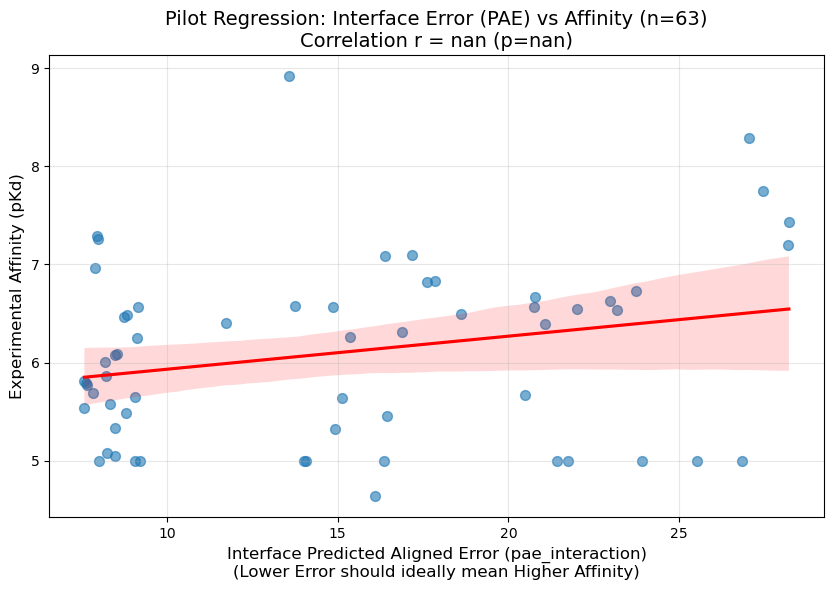


--- INTERPRETATION GUIDE ---
 NEUTRAL RESULT: r=nan
   No strong linear relationship found in this de novo subset.
   This justifies why you needed the larger PPB-Affinity dataset (Track 2).


In [12]:
subset = df[df['kd'].notnull()].copy()

print(f"Analyzing {len(subset)} confirmed binders...")

subset['pKd'] = -np.log10(subset['kd'])

plt.figure(figsize=(10, 6))

# Plot with Regression Line
sns.regplot(
    data=subset, 
    x='pae_interaction', 
    y='pKd', 
    scatter_kws={'s': 50, 'alpha': 0.6}, 
    line_kws={'color': 'red'}
)

# Calculate Pearson Correlation
r, p = stats.pearsonr(subset['pae_interaction'], subset['pKd'])

plt.title(f'Pilot Regression: Interface Error (PAE) vs Affinity (n={len(subset)})\nCorrelation r = {r:.2f} (p={p:.4f})', fontsize=14)
plt.xlabel('Interface Predicted Aligned Error (pae_interaction)\n(Lower Error should ideally mean Higher Affinity)', fontsize=12)
plt.ylabel('Experimental Affinity (pKd)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

print("\n--- INTERPRETATION GUIDE ---")
if r < -0.3:
    print(f" POSITIVE RESULT: r={r:.2f}")
    print("   Negative correlation means Lower Error (Low PAE) -> Higher Affinity (High pKd).")
    print("   The metric works!")
elif r > 0.3:
    print(f" SURPRISING RESULT: r={r:.2f}")
    print("   Positive correlation means Higher Error -> Higher Affinity.")
    print("   This contradicts the theory.")
else:
    print(f" NEUTRAL RESULT: r={r:.2f}")
    print("   No strong linear relationship found in this de novo subset.")
    print("   This justifies why you needed the larger PPB-Affinity dataset (Track 2).")

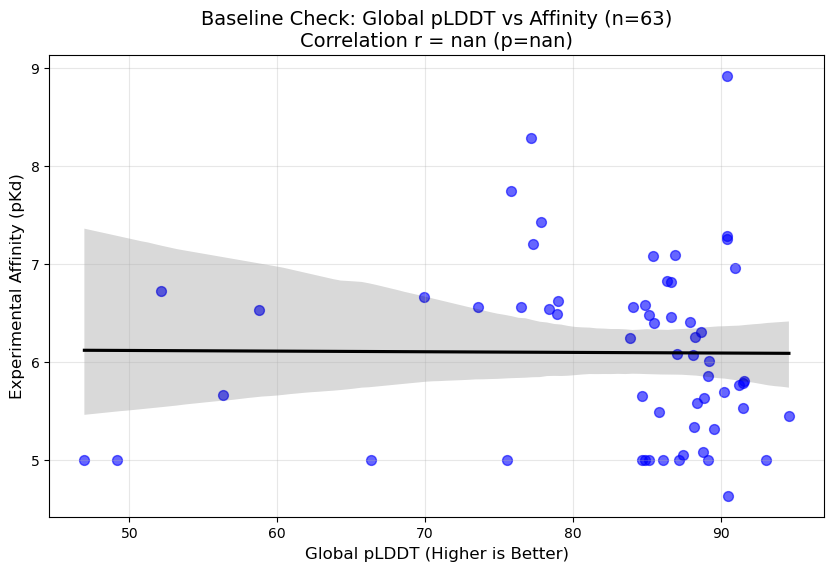

pLDDT Correlation: nan
INTERPRETATION: If this is lower than the PAE correlation, you prove that
                global structure quality is NOT enough to predict binding.


In [13]:
plt.figure(figsize=(10, 6))

subset = df[df['kd'].notnull()].copy()
subset['pKd'] = -np.log10(subset['kd'])

sns.regplot(
    data=subset, 
    x='plddt', 
    y='pKd', 
    scatter_kws={'s': 50, 'alpha': 0.6, 'color': 'blue'}, 
    line_kws={'color': 'black'}
)

r_plddt, p_plddt = stats.pearsonr(subset['plddt'], subset['pKd'])

plt.title(f'Baseline Check: Global pLDDT vs Affinity (n={len(subset)})\nCorrelation r = {r_plddt:.2f} (p={p_plddt:.4f})', fontsize=14)
plt.xlabel('Global pLDDT (Higher is Better)', fontsize=12)
plt.ylabel('Experimental Affinity (pKd)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"pLDDT Correlation: {r_plddt:.2f}")
print("INTERPRETATION: If this is lower than the PAE correlation, you prove that")
print("                global structure quality is NOT enough to predict binding.")


Analyzing Binding Strength Categories (n=402)...
Categories found: ['strong' 'medium' 'weak' 'none' 'unknown']


C:\Users\Jan R\AppData\Local\Temp\ipykernel_10660\3931504318.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


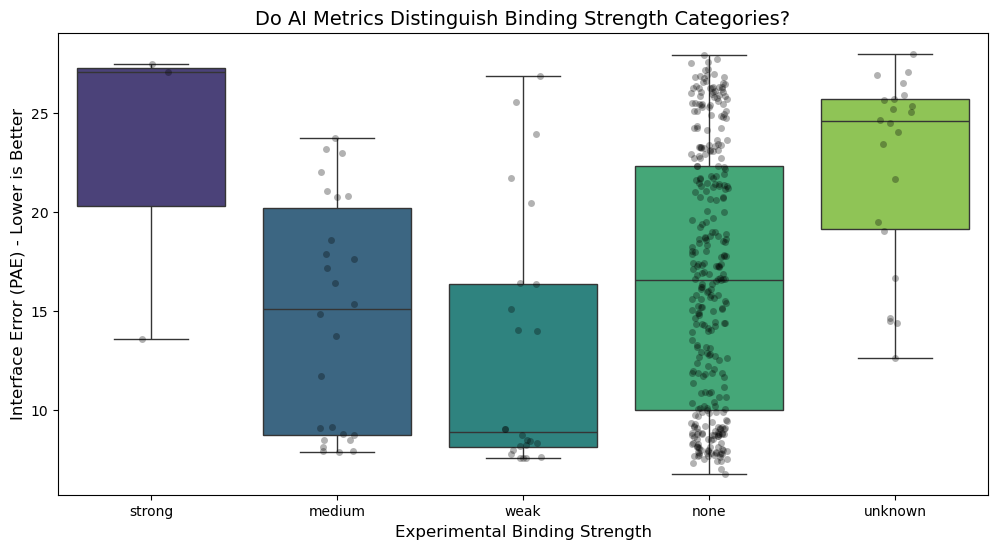

INTERPRETATION: Ideally, the 'High' binding strength box should be LOWER
                (lower error) than the 'Low' or 'Non-binder' boxes.


In [14]:
strength_subset = df[df['binding_strength'].notnull()].copy()

print(f"\nAnalyzing Binding Strength Categories (n={len(strength_subset)})...")
print("Categories found:", strength_subset['binding_strength'].unique())

plt.figure(figsize=(12, 6))

sns.boxplot(
    data=strength_subset,
    x='binding_strength',
    y='pae_interaction',
    palette='viridis' 
)


sns.stripplot(
    data=strength_subset,
    x='binding_strength',
    y='pae_interaction',
    color='black',
    alpha=0.3,
    jitter=True
)

plt.title('Do AI Metrics Distinguish Binding Strength Categories?', fontsize=14)
plt.ylabel('Interface Error (PAE) - Lower is Better', fontsize=12)
plt.xlabel('Experimental Binding Strength', fontsize=12)
plt.show()

print("INTERPRETATION: Ideally, the 'High' binding strength box should be LOWER")
print("                (lower error) than the 'Low' or 'Non-binder' boxes.")